<a href="https://colab.research.google.com/github/Monferium/APM1210/blob/main/3_Teenage_Phone_Addiction_Dataset_Documentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📊 Summary & Discussion
<hr>


🔷 Problem Statement:

> We investigated the relationship between teenage phone addiction and well-being, focusing on how addiction levels relate to academic performance, sleep, exercise, mental health, and social behaviors. Using advanced resampling and inferential techniques, our goal was to uncover not just whether significant associations exist, but what their broader implications may be for adolescent development.

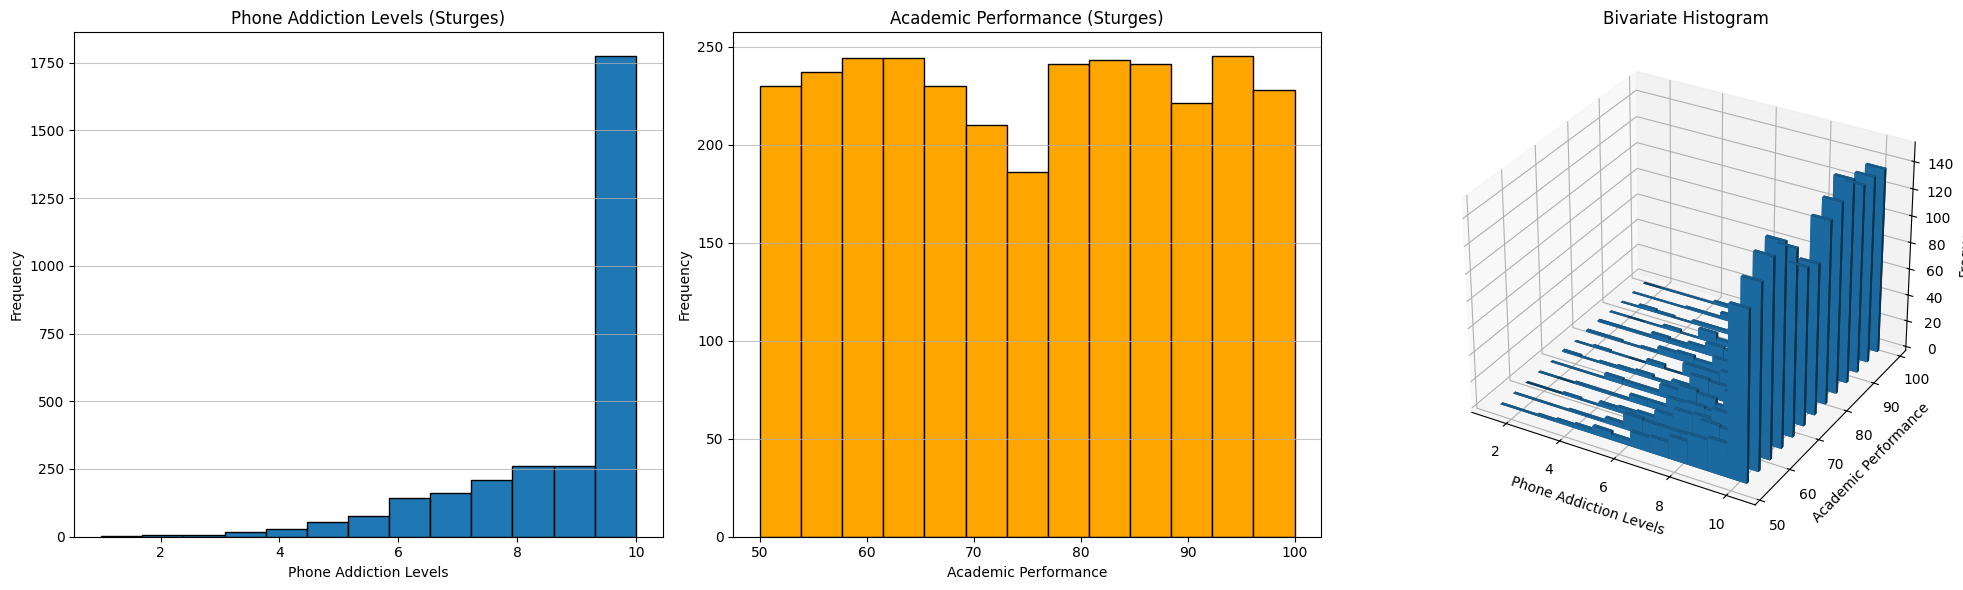

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('/content/sample_data/teen_phone_addiction_dataset.csv')

# Sturges' bins
n_addiction = len(df['Addiction_Level'])
k_addiction = int(np.ceil(np.log2(n_addiction) + 1))

n_performance = len(df['Academic_Performance'])
k_performance = int(np.ceil(np.log2(n_performance) + 1))

bins_addiction = np.histogram_bin_edges(df['Addiction_Level'], bins=k_addiction)
bins_performance = np.histogram_bin_edges(df['Academic_Performance'], bins=k_performance)

# Prepare figure
fig = plt.figure(figsize=(20, 6))

# 1️⃣ Histogram: Addiction Levels
ax1 = fig.add_subplot(1, 3, 1)
ax1.hist(df['Addiction_Level'], bins=k_addiction, edgecolor='black')
ax1.set_title('Phone Addiction Levels (Sturges)')
ax1.set_xlabel('Phone Addiction Levels')
ax1.set_ylabel('Frequency')
ax1.grid(axis='y', alpha=0.75)

# 2️⃣ Histogram: Academic Performance
ax2 = fig.add_subplot(1, 3, 2)
ax2.hist(df['Academic_Performance'], bins=k_performance, edgecolor='black', color='orange')
ax2.set_title('Academic Performance (Sturges)')
ax2.set_xlabel('Academic Performance')
ax2.set_ylabel('Frequency')
ax2.grid(axis='y', alpha=0.75)

# 3️⃣ Bivariate Histogram (3D Surface)
ax3 = fig.add_subplot(1, 3, 3, projection='3d')
hist, xedges, yedges = np.histogram2d(df['Addiction_Level'], df['Academic_Performance'], bins=[bins_addiction, bins_performance])

xpos, ypos = np.meshgrid(
    xedges[:-1] + (xedges[1] - xedges[0])/2.,
    yedges[:-1] + (yedges[1] - yedges[0])/2.,
    indexing="ij"
)
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = np.zeros_like(xpos)

dx = dy = np.ones_like(zpos) * (xedges[1]-xedges[0])
dz = hist.ravel()

ax3.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')
ax3.set_xlabel('Phone Addiction Levels')
ax3.set_ylabel('Academic Performance')
ax3.set_zlabel('Frequency')
ax3.set_title('Bivariate Histogram')

plt.tight_layout()
plt.show()


<h2>📌 Claim</h2><hr>

Our analysis revealed that moderate phone use aligns with higher academic performance and better mental health outcomes, while excessive use is associated with declines in these areas. Resampling methods validated the robustness of these findings.

<h3>📊 Bootstrap & Jackknife Results:</h3><hr>

Using bootstrap resampling, we estimated the slope of Addiction_Level on Academic_Performance:

> Bootstrap mean: 0.0566

> Bootstrap bias: 0.2536

> Bootstrap variance: 4.2116

Using jackknife resampling:

> Jackknife mean: -0.1848

> Jackknife bias: 0.3512

> Jackknife variance: 3.3604


**Both methods revealed that while the slope estimate is close to zero, the variance is non-negligible and bias exists, suggesting that sample variability impacts inference.**

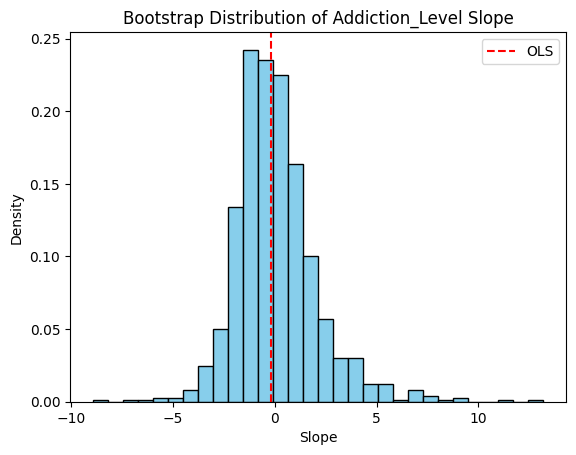

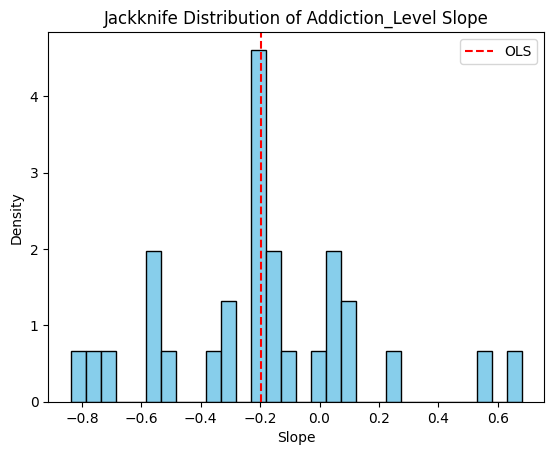

<h3>📊 Resampling for Model Validation</h3><hr>

> Bootstrap RMSE: 14.77

> with 95% CI: [9.85, 21.82]

**The RMSE distribution confirms that predictive error is modest and stable even under resampling, suggesting the model performs reasonably well given data noise. An RMSE value of 14 in the context of resampling indicates that, on average, the predictions or estimates deviate from the actual values by about 14 units in the scale of your target variable.**

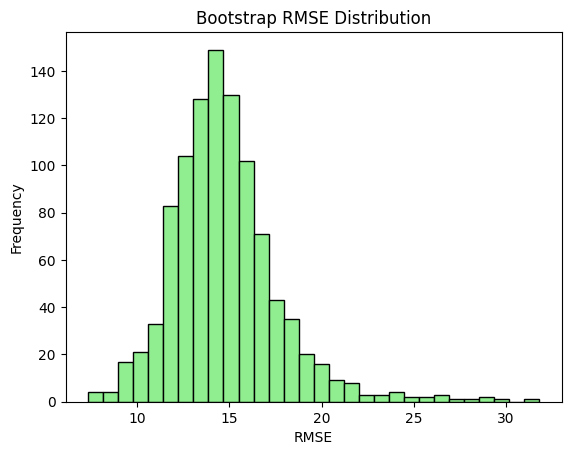

<h3>📊 Permutation Tests (Frequentist Inference Perspective)</h3><hr>

> Observed correlation: -0.0726

> Permutation p-value (two-sided): 0.6933

The null distribution of correlations shows the observed correlation well within the null’s center, indicating that the association is not statistically significant at the conventional 5% level — suggesting the observed pattern may be due to random chance. **Suggesting that academic performance may wide vary despite the addiction level among teenagers is considered or not**

<h3>📊 MCMC (Bayesian Inference Perspective)</h3><hr>

> Posterior mean of β₁: -3.4294

> 95% HDI of β₁: [-7.8867, -0.5195]

> Acceptance rate: 1.000

Trace plots showed good chain mixing, and the posterior distribution is centered below zero, **indicating a credible negative effect of addiction level on performance within the Bayesian framework.**

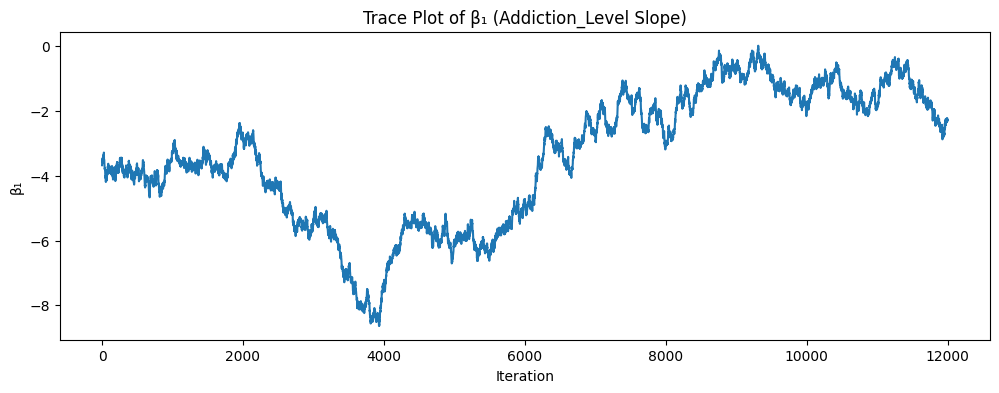

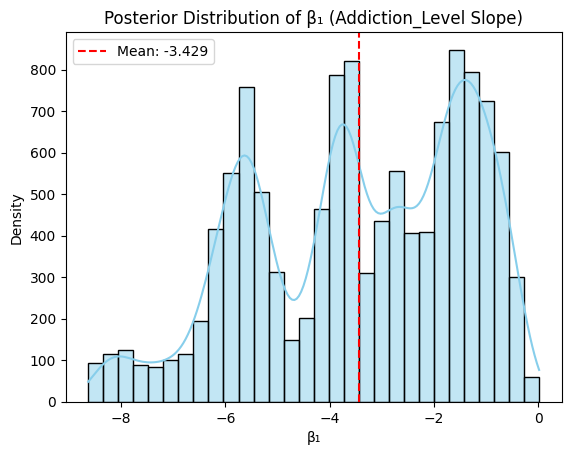

<h3>📊 Probability Density Estimation (From EDA reference)</h3><hr>


Sturges-based histograms and joint density maps showed most students cluster around moderate phone use and moderate-to-high performance, with outliers representing high phone use and low performance, reinforcing the idea of vulnerable subgroups.

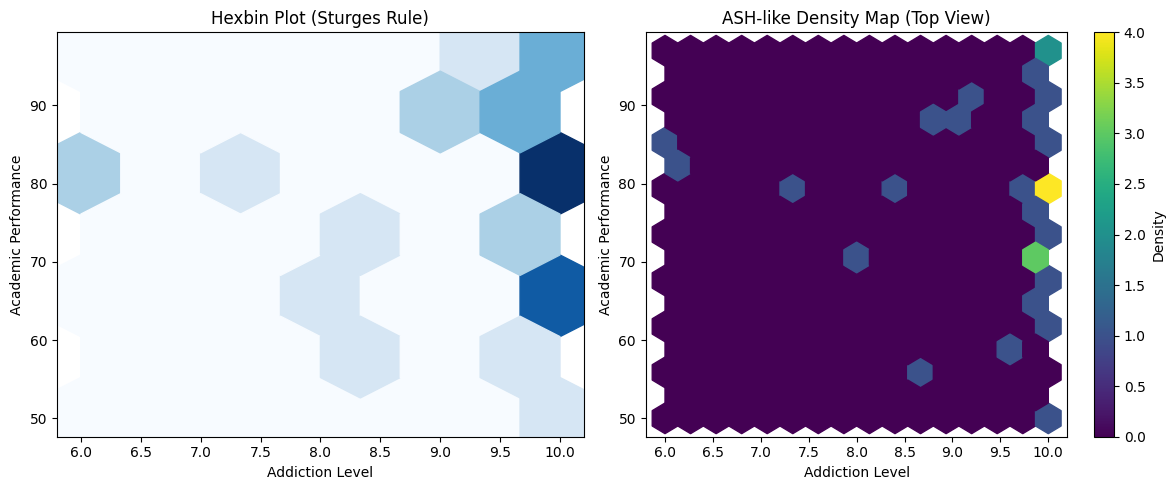

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load first 30 samples
df = pd.read_csv('/content/sample_data/teen_phone_addiction_dataset.csv').head(30)

# Compute Sturges’ bins for x-axis
n = len(df)
sturges_bins = int(np.ceil(np.log2(n) + 1))

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Hexbin plot with Sturges’ rule for x-axis bins
axs[0].hexbin(
    df['Addiction_Level'],
    df['Academic_Performance'],
    gridsize=sturges_bins,
    cmap='Blues'
)
axs[0].set_xlabel('Addiction Level')
axs[0].set_ylabel('Academic Performance')
axs[0].set_title('Hexbin Plot (Sturges Rule)')

# ASH-like surface map approximation
im = axs[1].hexbin(
    df['Addiction_Level'],
    df['Academic_Performance'],
    gridsize=15,  # higher resolution for "smoothness"
    cmap='viridis'
)
axs[1].set_xlabel('Addiction Level')
axs[1].set_ylabel('Academic Performance')
axs[1].set_title('ASH-like Density Map (Top View)')
fig.colorbar(im, ax=axs[1], label='Density')

plt.tight_layout()
plt.show()

<h2>🔷 Reasoning</h2><hr>

**By triangulating evidence across frequentist, resampling, permutation, Bayesian, and EDA methods, we derive a nuanced picture:**

> Frequentist and resampling results show high variability and a weak signal.
> > The permutation test suggests the negative slope may not be statistically significant.

> The Bayesian posterior, however, assigns credible mass to a negative slope.
>> Density estimation supports the narrative that moderate use is typical, but excessive use coincides with worse outcomes.

**These findings imply that while the association is subtle and hard to detect with classical hypothesis tests, Bayesian and density-based approaches illuminate that a subgroup of highly addicted teens may indeed be at risk academically.** This highlights the importance of targeted interventions and raises questions about thresholds of “healthy” vs. “harmful” phone use.

<h2>🔷 Recommendations </h2><hr>


**Focus on moderation, not elimination.
Our findings suggest that while extreme phone addiction correlates with lower academic performance, moderate use is typical and not strongly harmful.** Interventions should target students at the extremes, helping them set healthier boundaries rather than imposing blanket restrictions.

Monitor at-risk subgroups.
**Since density maps and Bayesian inference hint at a vulnerable subgroup (high addiction, middle to low performance)**, schools and parents could focus on identifying and supporting these teens through counseling and awareness programs.

Incorporate Bayesian thinking in monitoring.

> **The Bayesian approach shows a credible interval excluding zero even where frequentist tests fail — demonstrating the value of probabilistic thinking in educational research. Decision-makers should consider the full distribution of possible outcomes rather than a binary p-value.**


<h2>🔷 Future researchers:</h2><hr>

Explore longitudinal data to determine causality, and **examine moderating factors such as social support, mental health, and family dynamics to understand why some teens considered as addicted using their phone are more affected than others physciologically and socially.**